# EDA Purposes:
- How many documents/sentences/tokens are there in your input corpus? 
- What are the length distributions of documents and sentences? Any outliers?
- What is the distribution of all tokens? How many "rare" tokens (e.g., < 5 times)? 
- Is there any pre-processing required? e.g., remove the consecutive whitespace, remove some "weird" characters.
- Run AutoPhrase, and then plot the quality score distribution of single-word and multi-word phrases separately. Compare and discuss their differences.

**Note:** 
- For this project replication, we are asked to use DBLP.txt as input file. The following is the exploratory data analysis of DBLP.txt and the results of AutoPhrasing it. If the input dataset is another one, one can ignore the explainations.
- Since out model is DBLP.txt, which has its own ways to distinguish documents. The dataset have to follow the same structure to calculate its corresponding distributions correctly.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import defaultdict
from scipy.stats import skew 
#ignore future warning because of different versions in the environment
import warnings
warnings.filterwarnings("ignore") 
from tqdm import tqdm # Visualization of loop progress
import matplotlib.pyplot as plt

# Part 1
# Analyze the distributions and statistics of input corpus 
## 1. How many documents/sentences/tokens are there in the input corpus? 

### Counts of documents/sentences/tokens

Note: The results contain duplications

In [2]:
pd.read_csv('../data/eda/eda_files/count_stats.csv', index_col=0)

,Type,Count
0,Document,2243972
1,Sentence,5493596
2,Token,91614093


## 2. What are the length distributions of documents and sentences? Any outliers?
## Length distribution of documents

In [3]:
doc_df = pd.read_csv('../data/eda/eda_files/all_doc.csv')

Text(0.5, 1.0, 'Distribution of Documents Length')

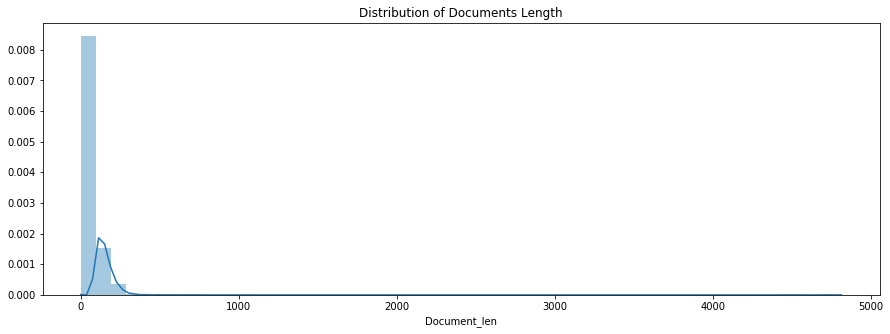

In [4]:
fig = plt.gcf()
fig.set_size_inches(15, 5)
doc_length = doc_df['Document_len']
sns.distplot(doc_length).set_title('Distribution of Documents Length')

Text(0.5, 1.0, 'Distribution of Documents Length')

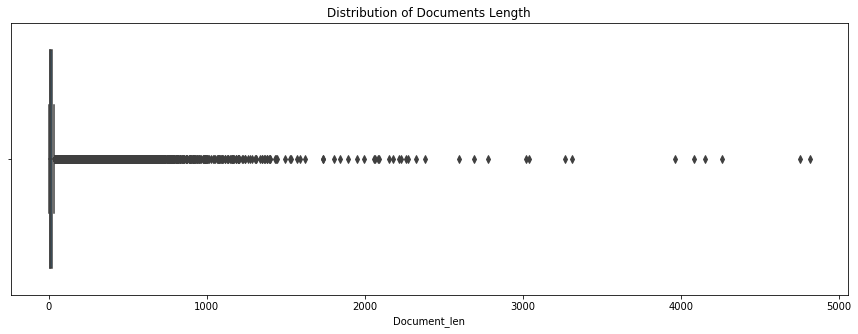

In [5]:
fig = plt.gcf()
fig.set_size_inches(15, 5)
sns.boxplot(doc_length).set_title('Distribution of Documents Length')

In [6]:
pd.read_csv('../data/eda/eda_files/doc_stats.csv', index_col=0)

,Statistics,Value
0,Skewness,3.565262
1,Percentile_10,5.000000
2,Percentile_25,7.000000
3,Percentile_50,10.000000
4,Percentile_75,19.000000
5,Percentile_90,147.000000
6,Mean,40.829162
7,Outlier_Cutoff,37.000000
8,Num_Outliers,522636.000000


#### Analysis: As we can see from the graphs and statistics above,  documents has an extreme right-skew distribution in terms of lengths.  We also investigated the outliers (i.e. more than 1.5 times IQR from 75-percentile) of document length. In total, there are about 23% outliers in total samples.

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Length distribution of sentences

In [8]:
sent_df = pd.read_csv('../data/eda/eda_files/all_sent.csv')

Text(0.5, 1.0, 'Distribution of Sentence Length')

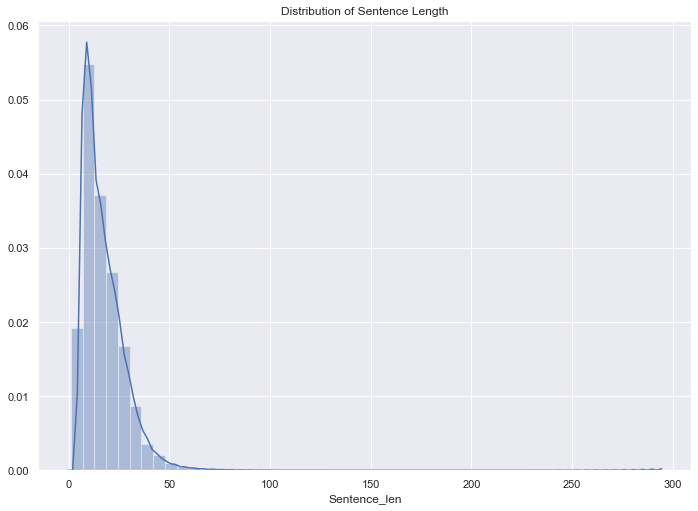

In [9]:
#sent_length = [len(sent.split()) for sent in sent_df['Sentence']]
sent_length = sent_df['Sentence_len']
sns.distplot(sent_length).set_title('Distribution of Sentence Length')

Text(0.5, 1.0, 'Distribution of Sentence Length')

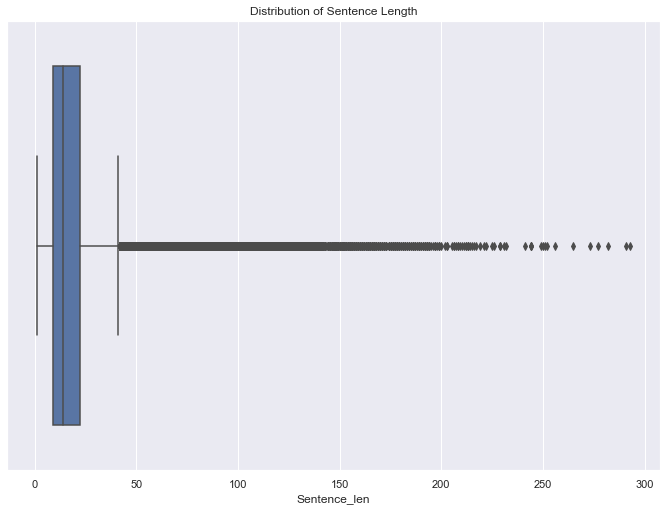

In [10]:
sns.boxplot(sent_length).set_title('Distribution of Sentence Length')

In [11]:
pd.read_csv('../data/eda/eda_files/sent_stats.csv', index_col=0)

,Statistics,Value
0,Skewness,1.921295
1,Percentile_10,6.000000
2,Percentile_25,9.000000
3,Percentile_50,14.000000
4,Percentile_75,22.000000
5,Percentile_90,30.000000
6,Mean,16.676525
7,Outlier_Cutoff,41.500000
8,Num_Outliers,140160.000000


#### As we can see from the graphs and statistics above,  sentences has a right-skew distribution in terms of lengths.  We also investigated the outliers (i.e. more than 1.5 times IQR from 75-percentile) of sentence length. Compared to document length, there are much less outliers. In total, there are about 2.55% outliers in total samples).

## 3.  What is the distribution of all tokens? How many "rare" tokens (e.g., < 5 times)?
### Frequency distribution of token

Note: Instead of length, we care more about the frequency of each unique tokens. The following are the distribution and statistics about the frequency.

**Infrequent(rare) token:** Frequence < 5

**Frequent token:** Frequency >= 5

In [13]:
all_token = pd.read_csv('../data/eda/eda_files/all_token_counts.csv')

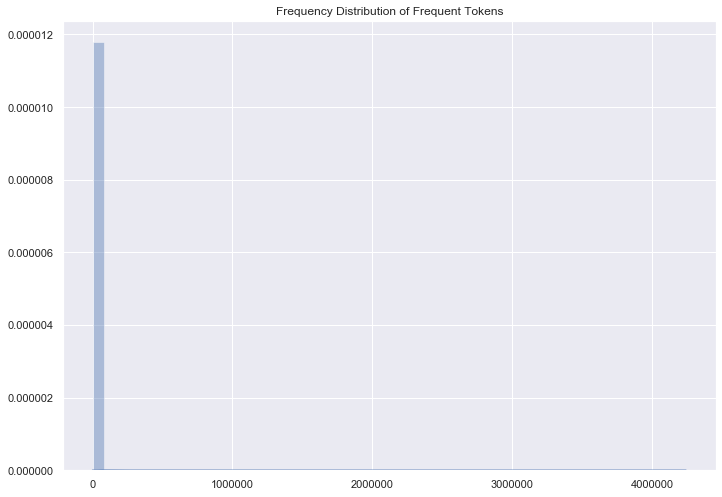

In [14]:
if all_token.shape[0] > 1000:
    sns.distplot([i for i in all_token['Count'] if i >= 5]).set_title('Frequency Distribution of Frequent Tokens')
else:
    plt.hist([i for i in all_token['Count']])
    plt.title('Frequency Distribution of Tokens')

#### When it comes to the token frequency, the distribution is even more skewed. Therefore, we only consider the token with more than five appearances, which takes up approximately 15% of the total unique token.

In [ ]:
pd.read_csv('../data/eda/eda_files/token_stats.csv', index_col=0)

For the purpose of initial cleaning, there is no required preprocessing step. Subtle problems in the input file will be solved when running AutoPhrase 

# Part 2
# Analyze the results of AutoPhrase
## 1. Plot the quality score distribution of Multi-word phrases
**From the graph, we notice the distribution is right skewed**

In [ ]:
multi_word_scores = pd.read_csv('../data/eda/eda_files/multi_score.csv', index_col=0)
sns.distplot(multi_word_scores['Scores']).set_title('Distribution of Multi-word Phrases Quality Score')

## 2. Plot the quality score distribution of Single-word phrases
**From the graph, we notice the distribution is symmetric**

In [ ]:
single_word_scores = pd.read_csv('../data/eda/eda_files/single_score.csv', index_col=0)
sns.distplot(single_word_scores['Scores']).set_title('Distribution of Single-word Phrases Quality Score')

## Plot the distributions in the same graph for comparisons

In [ ]:
fig = plt.figure(figsize=(11.7,8.27))
sns.distplot(multi_word_scores['Scores'], color="skyblue", kde = False, label = 'Multi Words')
sns.distplot(single_word_scores['Scores'], color="olive", kde = False, label = 'Single Word')
fig.legend(labels=['Multi Words', 'Single Word'])
plt.suptitle('Distributions of Single-word & Multi-word Phrases Quality Score');

**From this distribution we have two main observations.
The number of high-score single-word phrases is much less than that of multi-word phrases. The main reason is that phrases make the most sense when they are accompanied by other words, in which the “most sense” refers to the quality of the phrases. For example, “data” might be overwhelmingly seen across documents, but it might not be a high quality phrase based on the quality measurement of AutoPhrase framework, because the information it provides is limited and it is not “complete”. However, when it is combined with other words, the information it delivers increases dramatically. For example, “data warehouse” is of more “quality” than just “data” and that has a much higher score of 0.95. 
The raw number of single-word phrases is also less than that of multi-word phrases. This is due to the fact that, as mentioned in the previous point, the overall quality of the single-word phrases is lower than that of the multi-word counterparts, which makes us drop lots of the single-word phrases during the modelling process in exchange for higher quality phrases.**